# Define business requirement
#### By Ahmad Alkaseb

**Hypothesis**:  
*States with more relaxed gun ownership regulations experience a higher frequency of school shootings compared to states with stricter gun control policies.*

## Data collection

In [474]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [475]:
# Load the data into a dataframe using pandas library
df = pd.read_csv('Mass shooting data.csv')

## Data cleaning

In [477]:
df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,1978561,"April 15, 2021",District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,NaN
1,1978635,"April 15, 2021",Indiana,Indianapolis,8951 Mirabel Rd,8,5,NaN
2,1978652,"April 15, 2021",Illinois,Chicago,600 block of N Sawyer Ave,0,4,NaN
3,1978616,"April 15, 2021",Florida,Pensacola,700 Truman Ave,0,6,NaN
4,1976538,"April 13, 2021",Maryland,Baltimore,2300 block of Hoffman St,0,4,NaN
...,...,...,...,...,...,...,...,...
1995,634238,"August 20, 2016",Connecticut,Hamden,903 Dixwell Ave,0,4,NaN
1996,634731,"August 20, 2016",Washington,Tacoma,900 block of Pacific Avenue,0,5,NaN
1997,634819,"August 20, 2016",Alabama,Citronelle,Jim Platt Road,5,0,NaN
1998,632747,"August 18, 2016",Connecticut,Waterbury,402 E Main Street,0,4,NaN


In [478]:
# Let's have a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Incident ID     2000 non-null   int64  
 1   Incident Date   2000 non-null   object 
 2   State           2000 non-null   object 
 3   City Or County  2000 non-null   object 
 4   Address         1997 non-null   object 
 5   # Killed        2000 non-null   int64  
 6   # Injured       2000 non-null   int64  
 7   Operations      0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


We can conclude that we have three values missing in address, and that we have 0 data in operations (column).
We'll drop operations column, and add mode of address column into the three missing values.

In [480]:
# Replacing the address column with the mode
df['Address'] = df['Address'].fillna(df['Address'].mode()[0])

In [481]:
# Deleting the operations column
# Let's remove the uncessery attributes, that don't have anything to do with our hypothesis:
df = df.drop(['Operations'], axis=1)

In [482]:
# Let's see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Incident ID     2000 non-null   int64 
 1   Incident Date   2000 non-null   object
 2   State           2000 non-null   object
 3   City Or County  2000 non-null   object
 4   Address         2000 non-null   object
 5   # Killed        2000 non-null   int64 
 6   # Injured       2000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


#### We can conclude that our has been cleaned and is ready for exploration and analysis.

## Data Exploration & Analysis

In [485]:
# Let's have a look at the data
# df

# Get the first 5 rows
# df.head()

# Get 5 random rows
# df.sample(5)

# Get the last 5 rows
# df.tail()

In [486]:
# Get the names of all the columns
df.columns

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       '# Killed', '# Injured'],
      dtype='object')

In [487]:
print('Rows: {} Columns: {} Size: {}'.format(df.shape[0], df.shape[1], df.size))

Rows: 2000 Columns: 7 Size: 14000


In [488]:
# Get information about the data
df.describe()

,Incident ID,# Killed,# Injured
count,2.000000e+03,2000.000000,2000.00000
mean,1.372291e+06,1.051000,4.27500
std,3.952735e+05,2.106803,10.00187
min,6.327470e+05,0.000000,0.00000
25%,1.032258e+06,0.000000,3.00000
50%,1.428412e+06,1.000000,4.00000
75%,1.725039e+06,1.000000,5.00000
max,1.978652e+06,59.000000,441.00000


In [489]:
# Select categorical columns
data_column_category = df.select_dtypes(exclude=[np.number]).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create an empty dictionary to store the mappings
label_mappings = {}

# Apply LabelEncoder to each categorical column
for col in data_column_category:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping of original values to encoded values
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping for the 'state' column
print("State Mapping:")
for original, encoded in label_mappings['State'].items():
    print(f"{encoded}: {original}")

State Mapping:
0: Alabama
1: Alaska
2: Arizona
3: Arkansas
4: California
5: Colorado
6: Connecticut
7: Delaware
8: District of Columbia
9: Florida
10: Georgia
11: Idaho
12: Illinois
13: Indiana
14: Iowa
15: Kansas
16: Kentucky
17: Louisiana
18: Maine
19: Maryland
20: Massachusetts
21: Michigan
22: Minnesota
23: Mississippi
24: Missouri
25: Montana
26: Nebraska
27: Nevada
28: New Jersey
29: New Mexico
30: New York
31: North Carolina
32: Ohio
33: Oklahoma
34: Oregon
35: Pennsylvania
36: South Carolina
37: South Dakota
38: Tennessee
39: Texas
40: Utah
41: Virginia
42: Washington
43: West Virginia
44: Wisconsin
45: Wyoming


In [490]:
# Let's see how it turned out to be
df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,1978561,16,8,624,460,0,4
1,1978635,16,13,274,1622,8,5
2,1978652,16,12,108,1341,0,4
3,1978616,16,9,453,1456,0,6
4,1976538,11,19,40,649,0,4
...,...,...,...,...,...,...,...
1995,634238,113,6,240,1648,0,4
1996,634731,113,42,578,1640,0,5
1997,634819,113,0,114,1809,5,0
1998,632747,103,6,625,1042,0,4


array([[<Axes: title={'center': 'Incident ID'}>,
        <Axes: title={'center': 'Incident Date'}>,
        <Axes: title={'center': 'State'}>],
       [<Axes: title={'center': 'City Or County'}>,
        <Axes: title={'center': 'Address'}>,
        <Axes: title={'center': '# Killed'}>],
       [<Axes: title={'center': '# Injured'}>, <Axes: >, <Axes: >]],
      dtype=object)

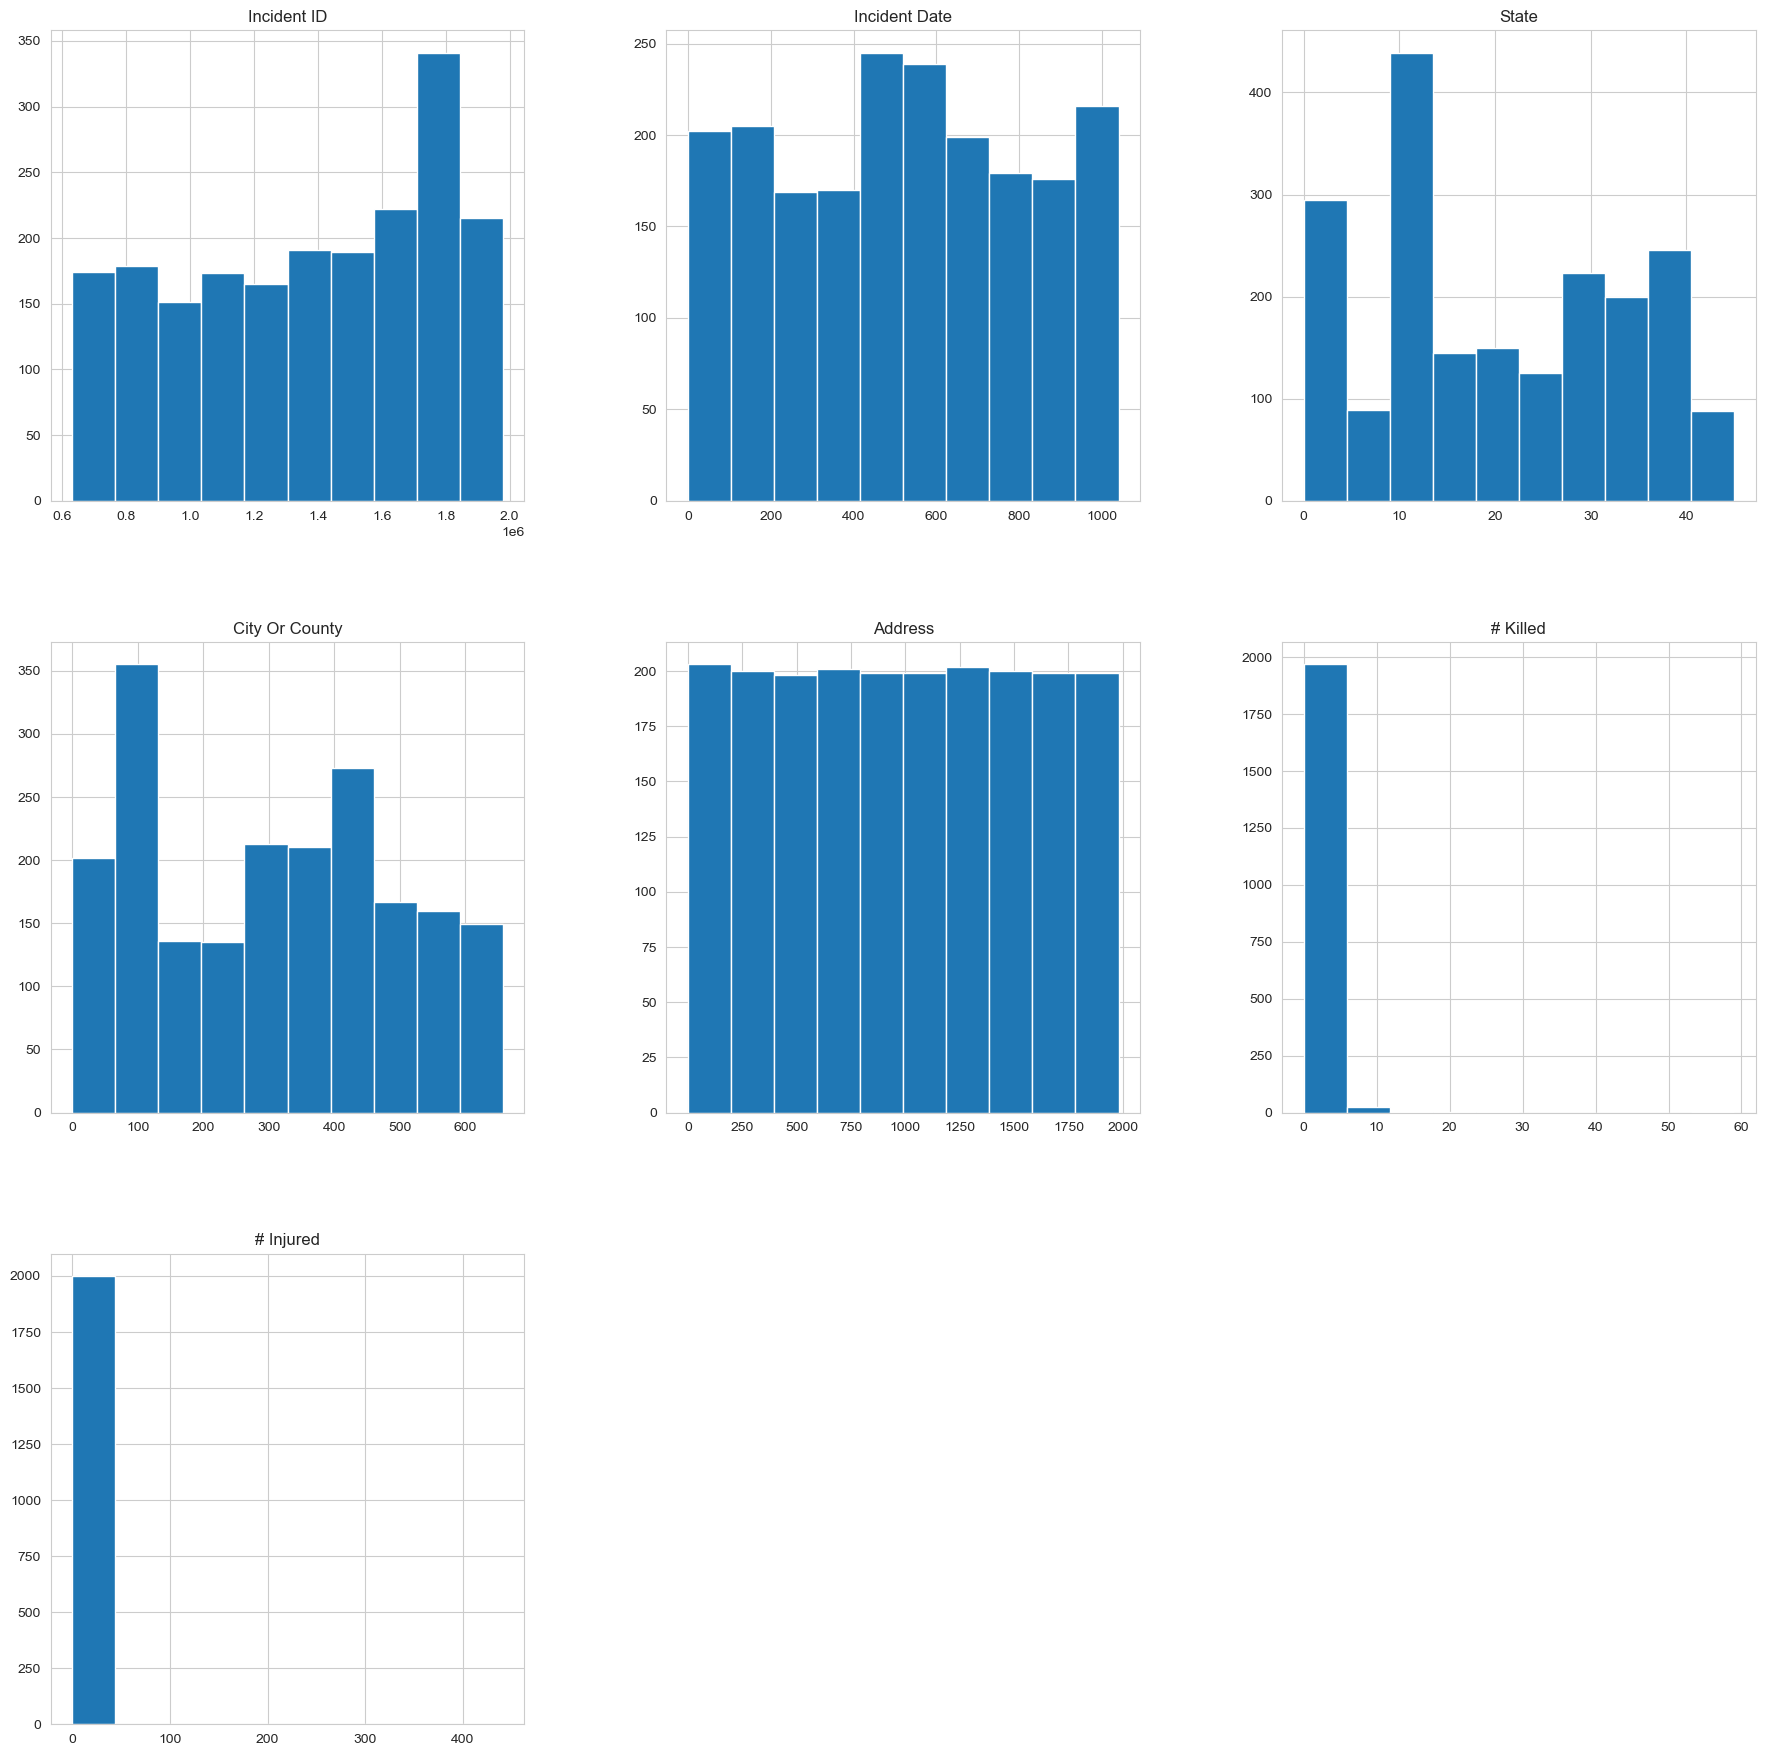

In [491]:
# Let's print out the histograms
df.hist(figsize=(22, 22))

#### We can conclude that none of them are ideally normally distributed

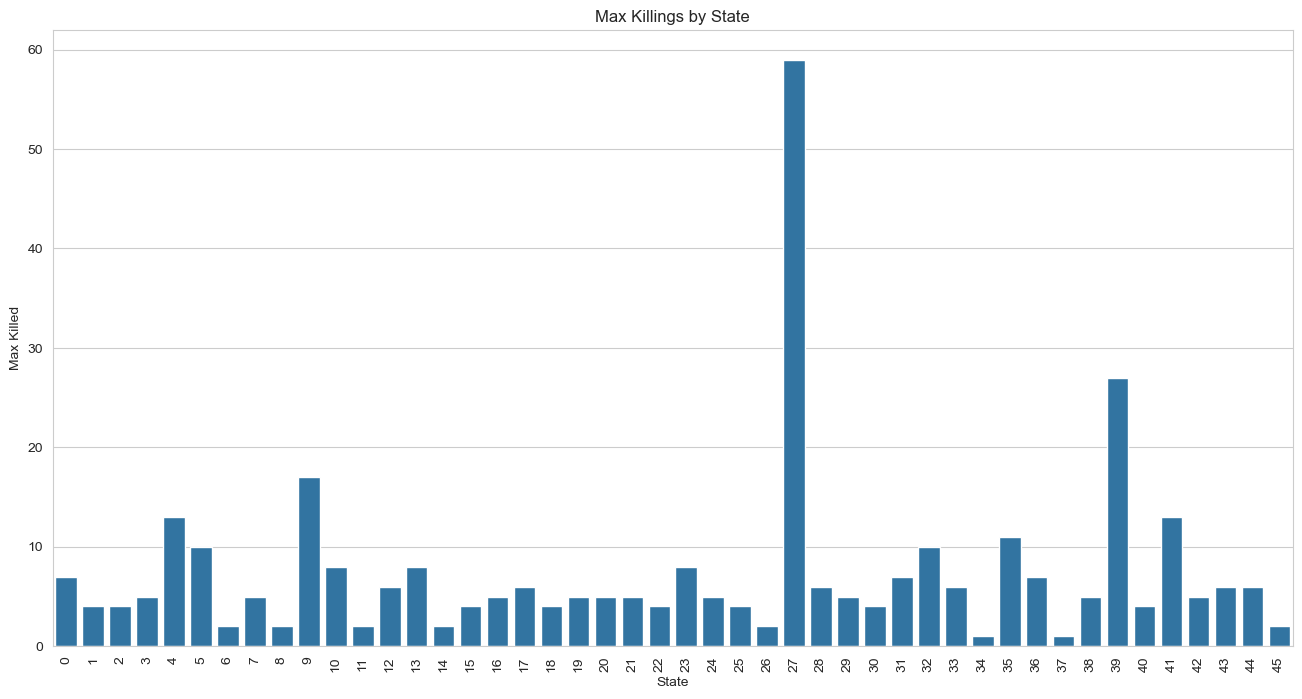

In [493]:
# Group by 'State' and get the maximum number of killings for each state
df_grouped = df.groupby('State')['# Killed'].max().reset_index()

# Set the style and size of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Create a bar plot
sns.barplot(x='State', y='# Killed', data=df_grouped)

# Set the plot title and labels
plt.title('Max Killings by State')
plt.xlabel('State')
plt.ylabel('Max Killed')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

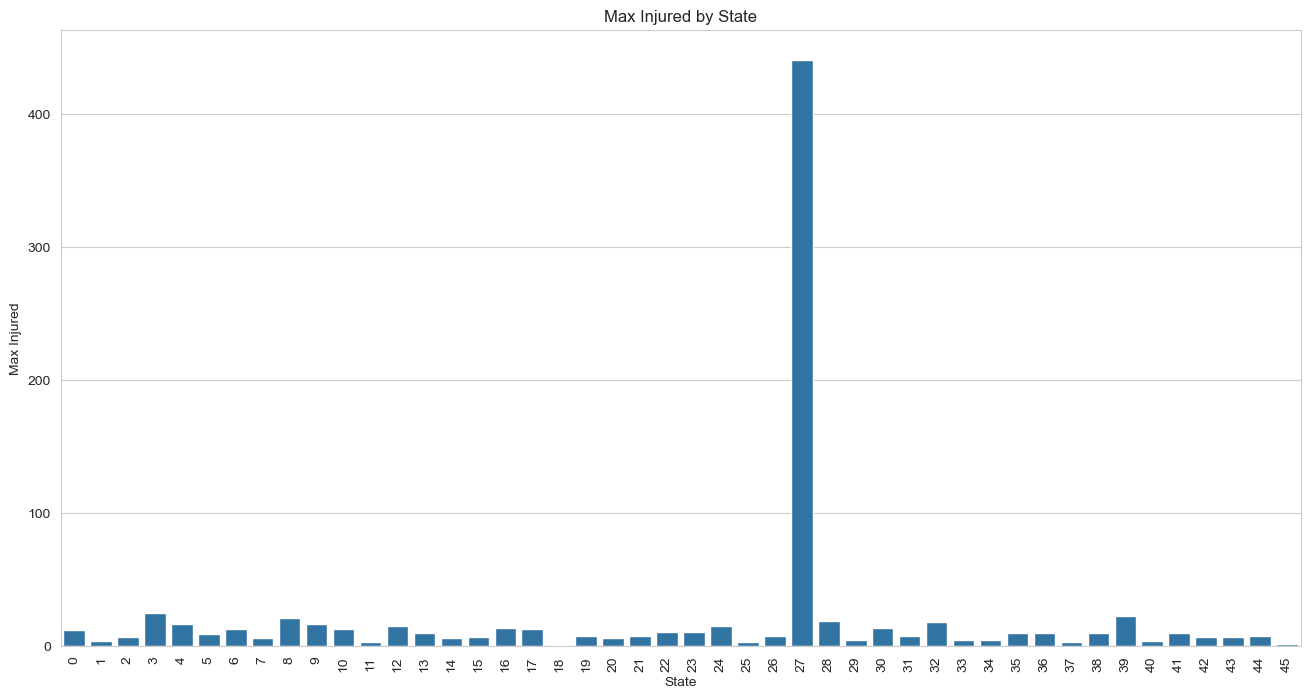

In [494]:
# Group by 'State' and get the maximum number of killings for each state
df_grouped = df.groupby('State')['# Injured'].max().reset_index()

# Set the style and size of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Create a bar plot
sns.barplot(x='State', y='# Injured', data=df_grouped)

# Set the plot title and labels
plt.title('Max Injured by State')
plt.xlabel('State')
plt.ylabel('Max Injured')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

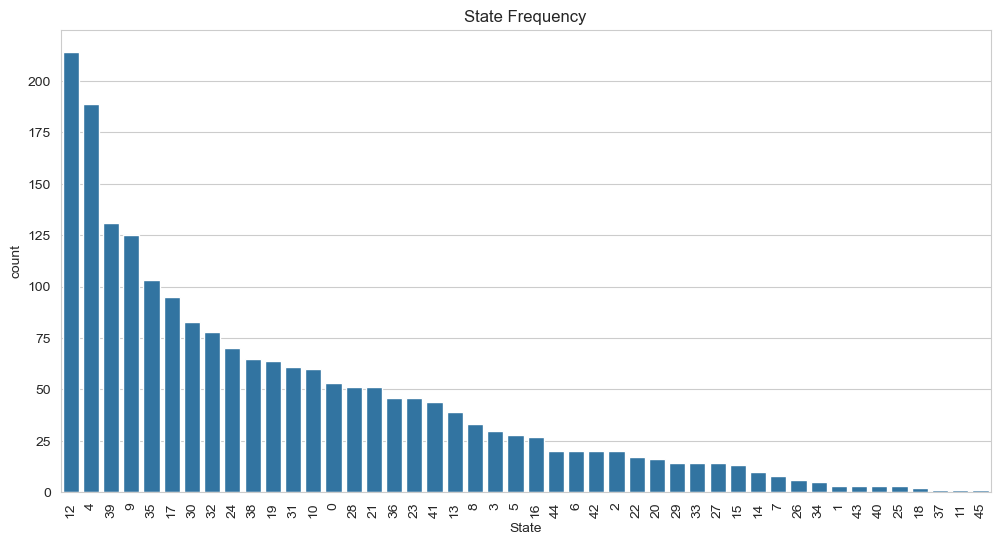

In [495]:
# How many school shootings pr State
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.title('State Frequency')
plt.xticks(rotation=90)
plt.show()

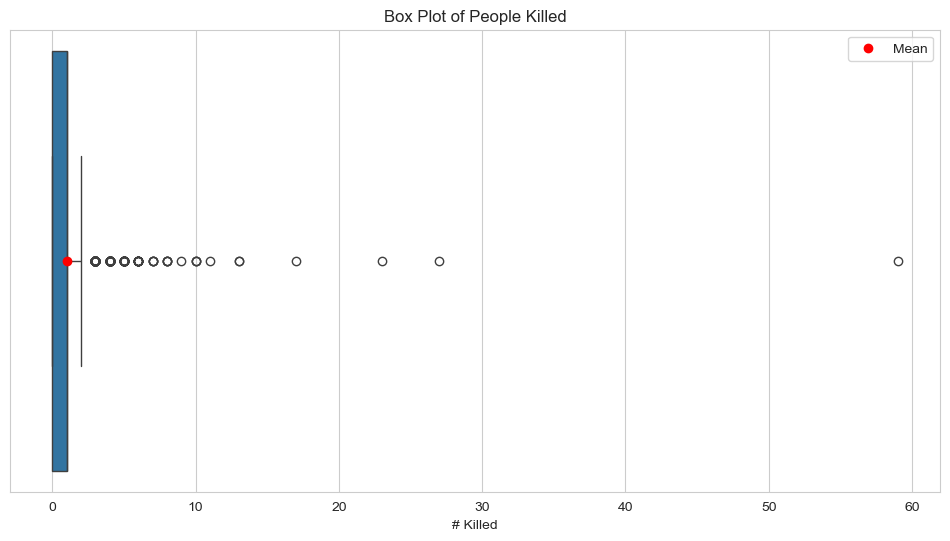

In [496]:
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='# Killed', data=df)

# Overlay the mean using a point plot
mean_value = df['# Killed'].mean()
plt.scatter(mean_value, 0, color='red', zorder=10, label='Mean')

# Add title and legend
plt.title('Box Plot of People Killed')
plt.legend()

# Show plot
plt.show()

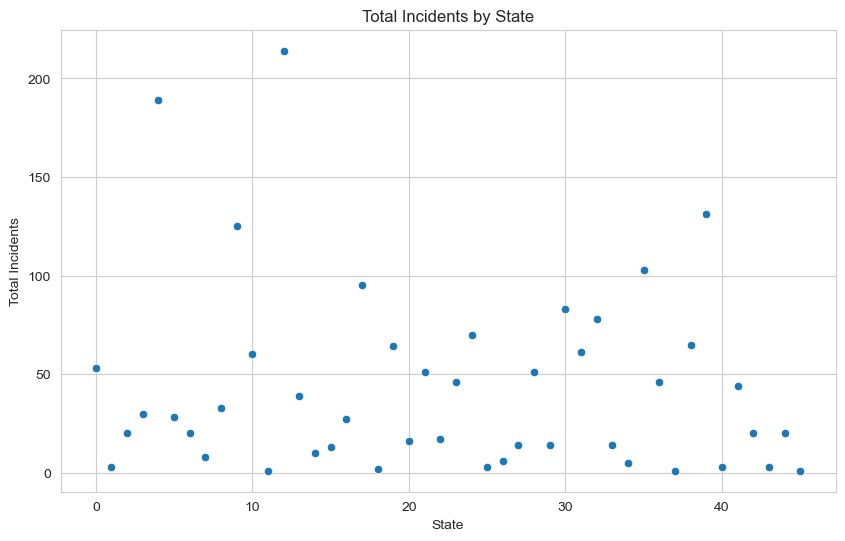

In [497]:
# Group the states by the total number of incidents
df_grouped = df.groupby('State')['Incident Date'].count().reset_index(name='Total Incidents')

plt.figure(figsize=(10, 6))

# Create a scatter plot to show total incidents by state
sns.scatterplot(x='State', y='Total Incidents', data=df_grouped)

# Add title and labels
plt.title('Total Incidents by State')
plt.xlabel('State')
plt.ylabel('Total Incidents')
plt.show()

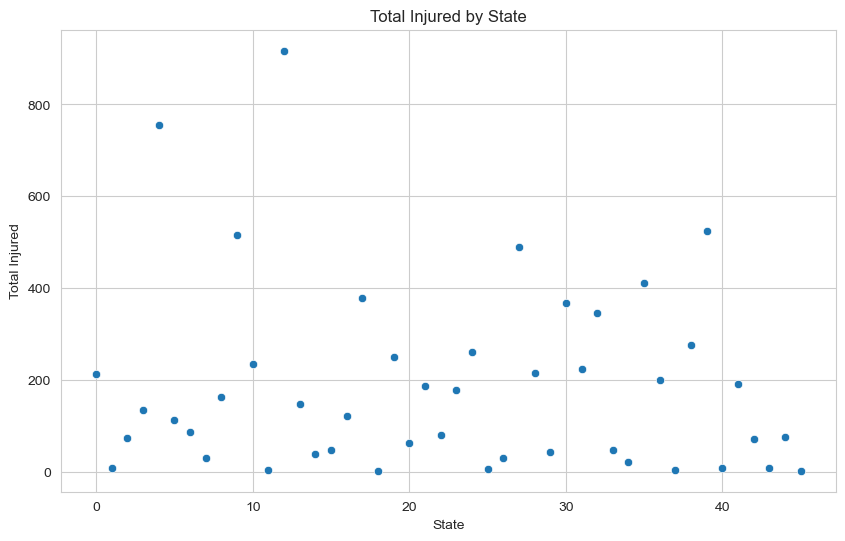

In [498]:
# Group by state and sum the 'injured' values
df_grouped = df.groupby('State')['# Injured'].sum().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Create the scatter plot to show total injured by state
sns.scatterplot(x='State', y='# Injured', data=df_grouped)

# Corrected title and labels
plt.title('Total Injured by State')
plt.xlabel('State')
plt.ylabel('Total Injured')
plt.show()

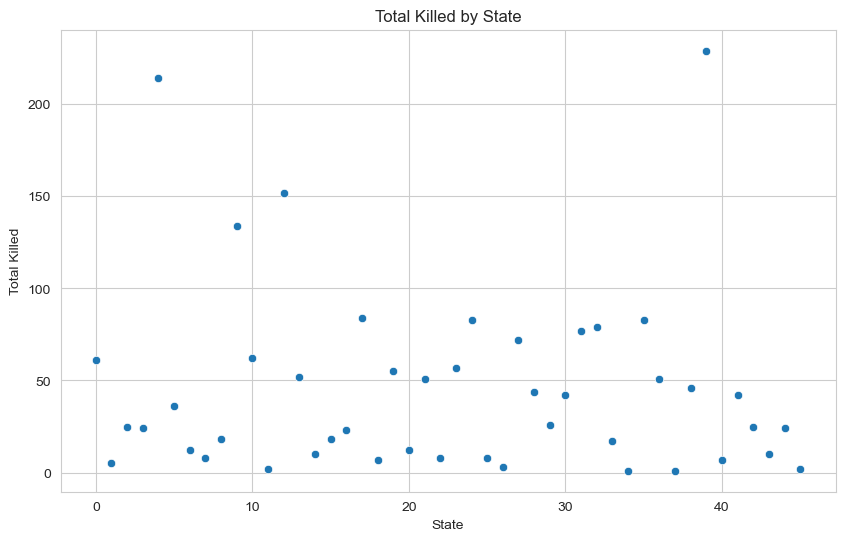

In [499]:
# Group by state and sum the 'killed' values
df_grouped = df.groupby('State')['# Killed'].sum().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Create the scatter plot to show total injured by state
sns.scatterplot(x='State', y='# Killed', data=df_grouped)

# Corrected title and labels
plt.title('Total Killed by State')
plt.xlabel('State')
plt.ylabel('Total Killed')
plt.show()

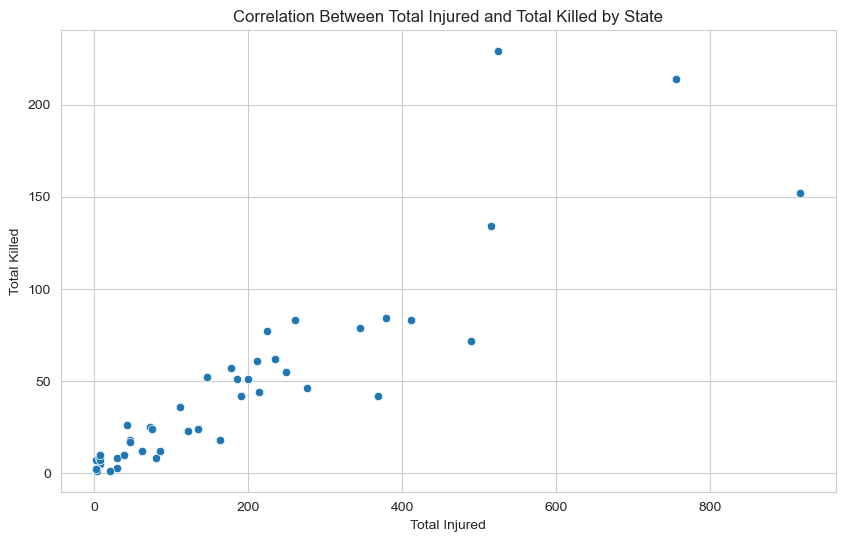

In [500]:
# Group by state and sum the 'injured' and 'killed' values
df_injured = df.groupby('State')['# Injured'].sum().reset_index()
df_killed = df.groupby('State')['# Killed'].sum().reset_index()

# Merge the two datasets on 'State' to have both '# Injured' and '# Killed' in the same DataFrame
df_grouped = pd.merge(df_injured, df_killed, on='State')

# Plot the scatter plot showing correlation between injured and killed
plt.figure(figsize=(10, 6))

# Create the scatter plot with '# Injured' on the x-axis and '# Killed' on the y-axis
sns.scatterplot(x='# Injured', y='# Killed', data=df_grouped)

# Add title and labels
plt.title('Correlation Between Total Injured and Total Killed by State')
plt.xlabel('Total Injured')
plt.ylabel('Total Killed')

plt.show()

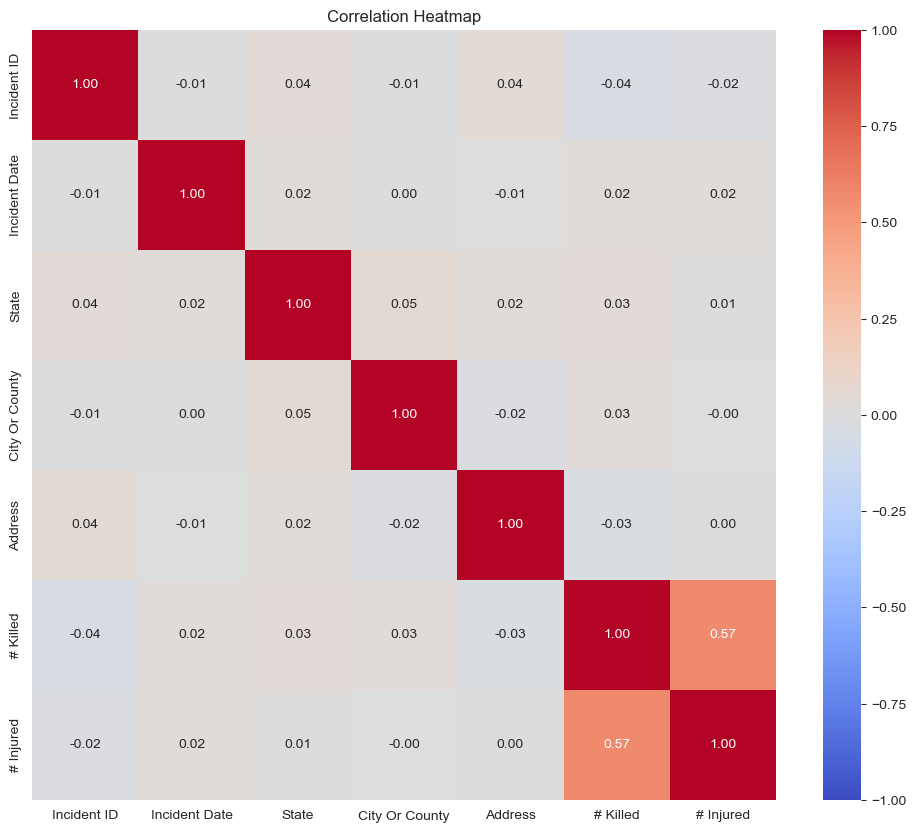

In [501]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Data modellering

In [503]:
# Linear Regression

In [504]:
# 1
df_shuffled = shuffle(df, random_state=42)

# 2
DV = '# Killed' 
X = df_grouped[['# Injured']] 
y = df_grouped[DV]

# 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# 4 
model = LinearRegression()

# 5
model.fit(X_train[['# Injured']], y_train)

# 6
print(model.intercept_)
print(model.coef_)

# 7 
print('Killed = {0:0.2f} + ({1:0.2f} x injured)'.format(model.intercept_, model.coef_[0]))

# 8 
predictions = model.predict(X_test[['# Injured']])

7.620759882065958
[0.17418829]
Killed = 7.62 + (0.17 x injured)


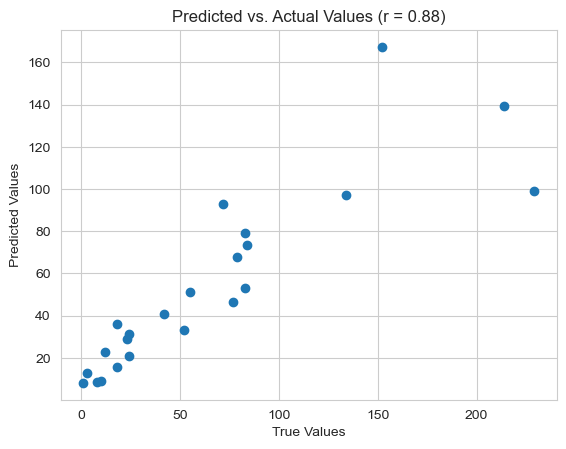

In [505]:
# plot correlation of predicted and actual values
# Plot the correlation of predicted and actual values in a scatterplot.
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [506]:
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)
metrics_df

,Metric,Value
0,MAE,19.695
1,MSE,1200.965
2,RMSE,34.655
3,R-Squared,0.727


In [507]:
# Multiple Regression

In [508]:
# 1. 
df_shuffled = shuffle(df, random_state=42)

# 2. 
DV = '# Killed'
X = df_shuffled[['# Injured', 'State']]  
y = df_shuffled[DV]

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 4. Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Fit with all features in X_train

# 5. Print model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# 6. Print the regression equation
feature_names = X.columns
equation = ' + '.join(f'({coef:0.2f} x {name})' for coef, name in zip(model.coef_, feature_names))
print(f'Killed = {model.intercept_:0.2f} + {equation}')

# 7. Make predictions
predictions = model.predict(X_test)

Intercept: 0.4945323379924229
Coefficients: [0.12057542 0.00250672]
Killed = 0.49 + (0.12 x # Injured) + (0.00 x State)


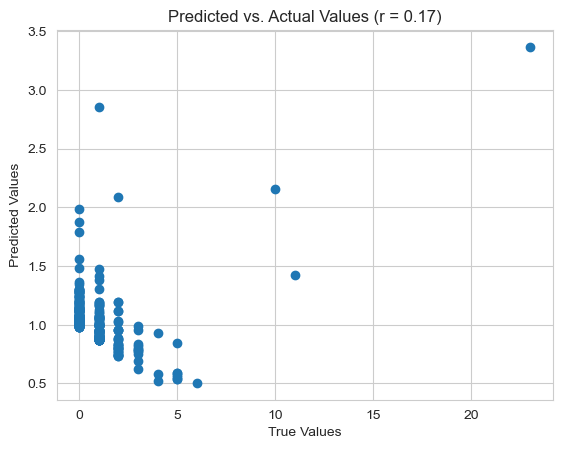

In [509]:
# plot correlation of predicted and actual values
# Plot the correlation of predicted and actual values in a scatterplot.
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [510]:
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)
metrics_df

,Metric,Value
0,MAE,1.068
1,MSE,3.417
2,RMSE,1.849
3,R-Squared,0.029


In [511]:
# Polynominal Regression

Metrics DataFrame:
      Metric    Value
0        MAE   17.266
1        MSE  792.651
2       RMSE   28.154
3  R-Squared    0.144


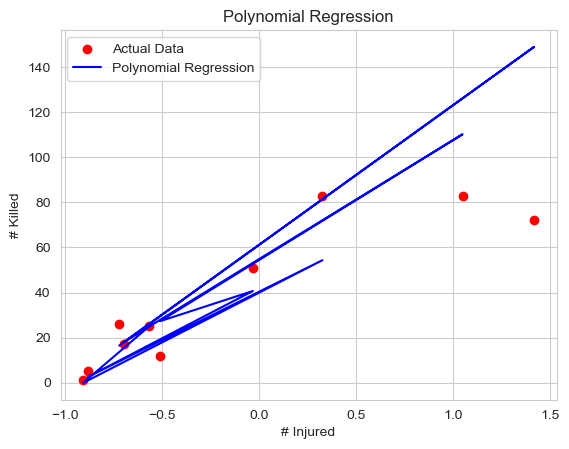

In [513]:
# Assuming df_grouped is already prepared
# 1. Shuffle the DataFrame and split data
df_shuffled = shuffle(df_grouped, random_state=42)
DV = '# Killed'
X = df_shuffled[['# Injured']]  # Independent variable(s)
y = df_shuffled[DV]  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# 2. Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 3. Polynomial Regression
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the Polynomial Regression model
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

# 4. Prediction
y_predict = pol_reg.predict(X_test_poly)

# 5. Plotting Function
def viz_polynomial():
    plt.scatter(X_test, y_test, color='red', label='Actual Data')
    plt.plot(X_test, y_predict, color='blue', label='Polynomial Regression')
    plt.title('Polynomial Regression')
    plt.xlabel('# Injured')
    plt.ylabel('# Killed')
    plt.legend()
    plt.show()

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r_squared = metrics.r2_score(y_test, y_predict)

# Create metrics DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [mae, mse, rmse, r_squared]
}).round(3)

# Display the DataFrame
print("Metrics DataFrame:")
print(metrics_df)

# Call the plotting function
viz_polynomial()
